In [38]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from keras.utils import np_utils

# LOAD DATA
train_images = np.load("./data/train_images.npy")
test_images = np.load("./data/test_images.npy")
train_labels = pd.read_csv("./data/train_labels.csv")

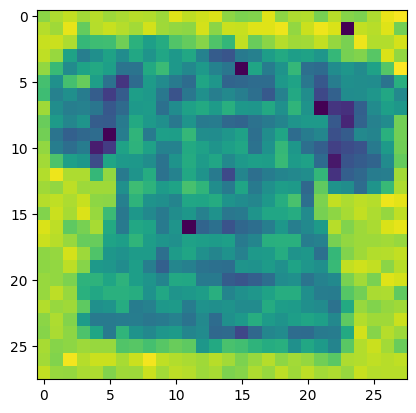

In [39]:
# DISPLAY IMAGE 
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()
# display a few images 
for i in range(1):
  show_image(train_images[i])
  

In [40]:
# x_train
X_train = train_images / 255.0
X_test = test_images / 255.0

# y_train
num_classes = 10
y_train = keras.utils.to_categorical(train_labels['label'], num_classes)

In [41]:
# MODEL

model = keras.Sequential([
    layers.InputLayer(input_shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])


In [42]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 7s 18ms/step - loss: 0.8456 - accuracy: 0.6920 - val_loss: 0.6450 - val_accuracy: 0.7488
Epoch 2/10
352/352 [==============================] - 6s 17ms/step - loss: 0.5849 - accuracy: 0.7830 - val_loss: 0.5572 - val_accuracy: 0.7886
Epoch 3/10
352/352 [==============================] - 6s 17ms/step - loss: 0.5175 - accuracy: 0.8085 - val_loss: 0.5112 - val_accuracy: 0.8094
Epoch 4/10
352/352 [==============================] - 6s 17ms/step - loss: 0.4739 - accuracy: 0.8263 - val_loss: 0.5047 - val_accuracy: 0.8110
Epoch 5/10
352/352 [==============================] - 6s 17ms/step - loss: 0.4419 - accuracy: 0.8376 - val_loss: 0.4600 - val_accuracy: 0.8314
Epoch 6/10
352/352 [==============================] - 6s 17ms/step - loss: 0.4169 - accuracy: 0.8463 - val_loss: 0.4347 - val_accuracy: 0.8414
Epoch 7/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3960 - accuracy: 0.8541 - val_loss: 0.4233 - val_accuracy: 0.8408

In [47]:
predictions = model.predict(X_test)

# Convert predictions to integer labels
predicted_labels = np.argmax(predictions, axis=1)

# Save predictions to a CSV file
submission = pd.DataFrame(columns=['ID', 'label'])
submission['ID'] = range(len(predicted_labels))
submission['label'] = predicted_labels
submission.to_csv('submission.csv', index=False)

625/625 [==============================] - 2s 3ms/step
